Minkowski distances for r from 1 to 10: [np.float64(45.339868657509214), 2.9289843106118, np.float64(1.4091389793916733), np.float64(1.0524070879085983), np.float64(0.9082752934861736), np.float64(0.8329803706917804), np.float64(0.7876882536288952), np.float64(0.7580558349316309), np.float64(0.7376022846028115), np.float64(0.7229627206668112)]


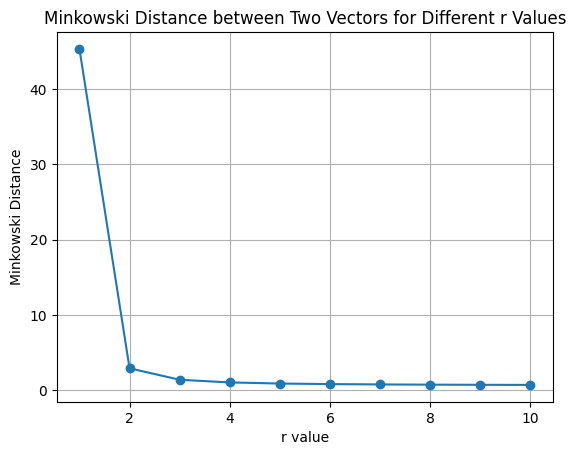

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

def load_data(filepath):
    return pd.read_excel(filepath)

def calculate_minkowski_distance(vector1, vector2, r):
    return distance.minkowski(vector1, vector2, r)

def plot_minkowski_distances(distances, r_values):
    plt.plot(r_values, distances, marker='o')
    plt.xlabel('r value')
    plt.ylabel('Minkowski Distance')
    plt.title('Minkowski Distance between Two Vectors for Different r Values')
    plt.grid(True)
    plt.show()

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"
    
    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    feature_name_class1 = class1_data.columns[0] 
    feature_name_class2 = class2_data.columns[0]  
    
    vector1 = class1_data[feature_name_class1].values
    vector2 = class2_data[feature_name_class2].values

    distances = []
    r_values = list(range(1, 11))  # r from 1 to 10

    for r in r_values:
        dist = calculate_minkowski_distance(vector1, vector2, r)
        distances.append(dist)

    print(f"Minkowski distances for r from 1 to 10: {distances}")

    plot_minkowski_distances(distances, r_values)

if __name__ == "__main__":
    main()


In [7]:
import numpy as np
import pandas as pd

def load_data(filepath): 
    return pd.read_excel(filepath)

def calculate_centroid(class_data):   
    return np.mean(class_data, axis=0)

def calculate_spread(class_data):   
    return np.std(class_data, axis=0)

def calculate_interclass_distance(centroid1, centroid2):  
    return np.linalg.norm(centroid1 - centroid2)

def main():  
    class1_data = load_data(r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx")
    class2_data = load_data(r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx")        
    centroid1 = calculate_centroid(class1_data)
    centroid2 = calculate_centroid(class2_data)
    
    spread1 = calculate_spread(class1_data)
    spread2 = calculate_spread(class2_data)
    
    interclass_distance = calculate_interclass_distance(centroid1, centroid2)
       
    print("Centroid of Class 1:", centroid1)
    print("Centroid of Class 2:", centroid2)
    print("Spread of Class 1:", spread1)
    print("Spread of Class 2:", spread2)
    print("Interclass Distance between Class 1 and Class 2:", interclass_distance)

if __name__ == "__main__":
    main()


Centroid of Class 1: 0                  -0.007528
1                  -0.001972
2                   0.006348
3                  -0.088203
4                  -0.000798
                      ...   
296                 0.000921
297                 0.185415
298                -0.008521
299                 0.024438
Judgement Status    1.456667
Length: 301, dtype: float64
Centroid of Class 2: 0                  -0.012091
1                  -0.018095
2                   0.007358
3                  -0.088819
4                  -0.021257
                      ...   
296                 0.008995
297                 0.137924
298                -0.005061
299                 0.031565
Judgement Status    1.456667
Length: 301, dtype: float64
Spread of Class 1: 0                   0.093912
1                   0.171566
2                   0.077913
3                   0.131511
4                   0.104228
                      ...   
296                 0.083101
297                 0.348836
298          

Mean of the feature '0': -0.007527541047760073
Variance of the feature '0': 0.00881949371387709


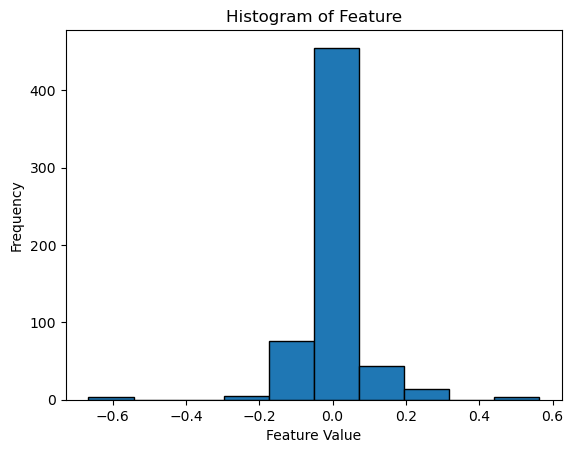

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    return pd.read_excel(filepath)

def calculate_mean_variance(feature_data):
    mean_value = np.mean(feature_data)
    variance_value = np.var(feature_data)
    return mean_value, variance_value

def plot_histogram(feature_data, bins=10):
    plt.hist(feature_data, bins=bins, edgecolor='black')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature')
    plt.show()

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"
    
    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)
    feature_name = class1_data.columns[0] 
    feature_data = class1_data[feature_name].values

    mean_value, variance_value = calculate_mean_variance(feature_data)

    print(f"Mean of the feature '{feature_name}':", mean_value)
    print(f"Variance of the feature '{feature_name}':", variance_value)

    plot_histogram(feature_data, bins=10)

if __name__ == "__main__":
    main()


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data(filepath):
    return pd.read_excel(filepath)

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"

    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    class1_data['label'] = 0 
    class2_data['label'] = 1 

    combined_data = pd.concat([class1_data, class2_data], axis=0)

    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    print("First few rows of X_train:")
    print(X_train[:5])

if __name__ == "__main__":
    main()


Training set size: 840 samples
Testing set size: 360 samples
First few rows of X_train:
[[ 0.0067251  -0.27109924 -0.10228541 ... -0.04923607  0.05834555
   2.        ]
 [ 0.15563194  0.37740669  0.07374391 ...  0.03545329  0.05148149
   1.        ]
 [-0.0804312  -0.18136436  0.13431241 ...  0.06491562  0.20331688
   1.        ]
 [ 0.45037475  0.05753796  0.23392306 ...  0.05266625 -0.0498118
   3.        ]
 [ 0.0067251  -0.27109924 -0.10228541 ... -0.04923607  0.05834555
   0.        ]]


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def load_data(filepath):
    return pd.read_excel(filepath)

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"

    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    class1_data['label'] = 0 
    class2_data['label'] = 1 

    combined_data = pd.concat([class1_data, class2_data], axis=0)

    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    knn_classifier.fit(X_train, y_train)
    
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy of kNN Classifier (k=3): {accuracy:.2f}")
    print("Classification Report:")
    print(report)

if __name__ == "__main__":
    main()


Accuracy of kNN Classifier (k=3): 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       185
           1       0.50      0.44      0.47       175

    accuracy                           0.52       360
   macro avg       0.51      0.51      0.51       360
weighted avg       0.52      0.52      0.51       360



In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(filepath):
    return pd.read_excel(filepath)

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"

    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    class1_data['label'] = 0  
    class2_data['label'] = 1 

    combined_data = pd.concat([class1_data, class2_data], axis=0)

    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    knn_classifier.fit(X_train, y_train)

    accuracy = knn_classifier.score(X_test, y_test)

    print(f"Accuracy of kNN Classifier on Test Set: {accuracy:.2f}")

if __name__ == "__main__":
    main()


Accuracy of kNN Classifier on Test Set: 0.52


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(filepath):
    """Loads data from an Excel file into a Pandas DataFrame."""
    return pd.read_excel(filepath)

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"

    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    class1_data['label'] = 0  
    class2_data['label'] = 1  

    combined_data = pd.concat([class1_data, class2_data], axis=0)

    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    print("Predicted classes for the test set:")
    print(y_pred)
    
    test_vect = X_test[0]
    predicted_class = knn_classifier.predict([test_vect])

    print(f"Predicted class for the given test vector: {predicted_class[0]}")

if __name__ == "__main__":
    main()


Predicted classes for the test set:
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0]
Predicted class for the given test vector: 1


Accuracy for k=1: 0.49
Accuracy for k=2: 0.52
Accuracy for k=3: 0.52
Accuracy for k=4: 0.54
Accuracy for k=5: 0.51
Accuracy for k=6: 0.54
Accuracy for k=7: 0.49
Accuracy for k=8: 0.52
Accuracy for k=9: 0.53
Accuracy for k=10: 0.48
Accuracy for k=11: 0.50
Accuracy for k=12: 0.50
Accuracy for k=13: 0.54
Accuracy for k=14: 0.54
Accuracy for k=15: 0.50
Accuracy for k=16: 0.50
Accuracy for k=17: 0.49
Accuracy for k=18: 0.53
Accuracy for k=19: 0.53
Accuracy for k=20: 0.51
Accuracy for k=21: 0.49
Accuracy for k=22: 0.51
Accuracy for k=23: 0.51
Accuracy for k=24: 0.49
Accuracy for k=25: 0.51
Accuracy for k=26: 0.51
Accuracy for k=27: 0.52
Accuracy for k=28: 0.52
Accuracy for k=29: 0.52
Accuracy for k=30: 0.51
Accuracy for k=31: 0.52
Accuracy for k=32: 0.51
Accuracy for k=33: 0.52
Accuracy for k=34: 0.52
Accuracy for k=35: 0.51
Accuracy for k=36: 0.53
Accuracy for k=37: 0.51
Accuracy for k=38: 0.52
Accuracy for k=39: 0.50
Accuracy for k=40: 0.52
Accuracy for k=41: 0.52
Accuracy for k=42: 0.51
A

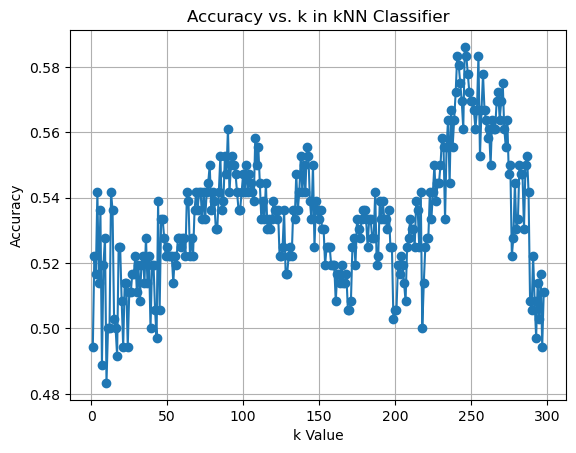

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def load_data(filepath):
    return pd.read_excel(filepath)

def calculate_accuracy_for_k(X_train, y_train, X_test, y_test, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    return accuracy

def plot_accuracy_vs_k(k_values, accuracies):
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k in kNN Classifier')
    plt.grid(True)
    plt.show()

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"
    
    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)

    class1_data['label'] = 0  
    class2_data['label'] = 1  

    combined_data = pd.concat([class1_data, class2_data], axis=0)

    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    k_values = list(range(1, 299))
    accuracies = []
    
    for k in k_values:
        accuracy = calculate_accuracy_for_k(X_train, y_train, X_test, y_test, k)
        accuracies.append(accuracy)
        print(f"Accuracy for k={k}: {accuracy:.2f}")
    
    plot_accuracy_vs_k(k_values, accuracies)

if __name__ == "__main__":
    main()


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

def load_data(filepath):
    return pd.read_excel(filepath)

def main():
    filepath_class1 = r"C:\Users\srira\Downloads\English_Extractive_Embeddings_Fasttext.xlsx"
    filepath_class2 = r"C:\Users\srira\Downloads\English_Abstractive_Embeddings_Fasttext.xlsx"
    
    class1_data = load_data(filepath_class1)
    class2_data = load_data(filepath_class2)
    
    class1_data['label'] = 0 
    class2_data['label'] = 1  

    combined_data = pd.concat([class1_data, class2_data], axis=0)
    
    X = combined_data.drop(columns=['label']).values  # Feature vectors
    y = combined_data['label'].values  # Class labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    
    knn_classifier.fit(X_train, y_train)
    
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)
    
    print("Confusion Matrix for Training Data:")
    print(confusion_matrix(y_train, y_train_pred))
    
    print("Classification Report for Training Data:")
    print(classification_report(y_train, y_train_pred))
    
    print("Confusion Matrix for Test Data:")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("Classification Report for Test Data:")
    print(classification_report(y_test, y_test_pred))

if __name__ == "__main__":
    main()


Confusion Matrix for Training Data:
[[322  93]
 [156 269]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       415
           1       0.74      0.63      0.68       425

    accuracy                           0.70       840
   macro avg       0.71      0.70      0.70       840
weighted avg       0.71      0.70      0.70       840

Confusion Matrix for Test Data:
[[109  76]
 [ 98  77]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       185
           1       0.50      0.44      0.47       175

    accuracy                           0.52       360
   macro avg       0.51      0.51      0.51       360
weighted avg       0.52      0.52      0.51       360

